In [20]:
%pip install openpyxl

  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)

   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   ---------------------------------------- 2/2 [openpyxl]

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.makedirs('figures', exist_ok=True)

In [3]:
titanic = pd.read_csv('Titanic_Edited.csv')

In [4]:
titanic

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",M,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",F,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",F,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",M,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
884,887,0,2,"Montvila, Rev. Juozas",M,27.0,0,0,211536,13.0000,S
885,888,1,1,"Graham, Miss. Margaret Edith",F,19.0,0,0,112053,30.0000,S
886,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",F,NaN,1,2,W./C. 6607,23.4500,S
887,890,1,1,"Behr, Mr. Karl Howell",M,26.0,0,0,111369,30.0000,C


In [7]:
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)
titanic = pd.get_dummies(titanic, columns=['Gender', 'Embarked'], drop_first=True)

In [17]:
titanic

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Gender_M,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
884,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,True,False,True
885,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,False,False,True
886,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,W./C. 6607,23.4500,False,False,True
887,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,True,False,False


In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Ticket       889 non-null    object 
 8   Fare         889 non-null    float64
 9   Gender_M     889 non-null    bool   
 10  Embarked_Q   889 non-null    bool   
 11  Embarked_S   889 non-null    bool   
dtypes: bool(3), float64(2), int64(5), object(2)
memory usage: 65.2+ KB


In [9]:
survival_by_class = titanic.groupby('Pclass')['Survived'].mean()
print(survival_by_class)

Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64


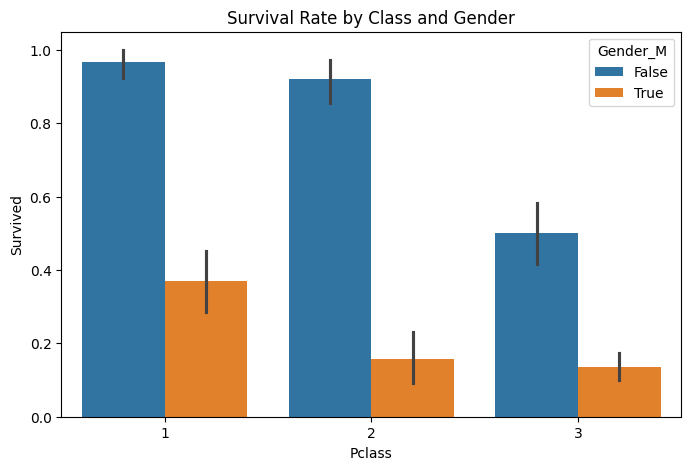

In [15]:
plt.figure(figsize=(8, 5))
sns.barplot(data=titanic, x='Pclass', y='Survived', hue='Gender_M')
plt.title('Survival Rate by Class and Gender')

os.makedirs('figures', exist_ok=True)

plt.savefig('figures/survival_plot.png')  # For GitHub
plt.show()

In [21]:
os.makedirs('excel_files', exist_ok=True)

with pd.ExcelWriter('excel_files/titanic_analysis.xlsx') as writer:
    survival_by_class.to_excel(writer, sheet_name='Summary')
    titanic.to_excel(writer, sheet_name='Cleaned_Data')